<a href="https://colab.research.google.com/github/niehues/pca_intro/blob/master/Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to basic visualizations of multidimensional data


In [0]:
# import libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing

In [53]:
# load the example data set
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
data = datasets.load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [85]:
# convert to pandas data frame
df = pd.DataFrame(data.data, columns = data.feature_names)
print(df)

AttributeError: ignored

In [84]:
# create array with class values
classes = np.array([data.target_names[0] if _ == 0 else data.target_names[1] 
                    for _ in data.target])
print(classes[1:13])

['malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant']


<Figure size 432x288 with 0 Axes>

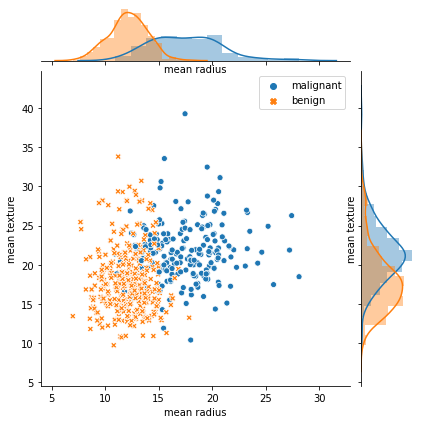

In [103]:
x, y = "mean radius", "mean texture"
# plot histogram of individual features
import matplotlib.pyplot as plt
import seaborn as sns
# new plot
plt.figure()
jointplot_2d = sns.JointGrid(x = x, y = y, data = df)
# scatter plot
jointplot_2d = jointplot_2d.plot_joint(
    sns.scatterplot, hue = classes, style = classes)
# plot distributions
for _ in (0, 1):
  sns.distplot(df.loc[data.target == _, x], ax = jointplot_2d.ax_marg_x)
  sns.distplot(df.loc[data.target == _, y], ax = jointplot_2d.ax_marg_y, 
               vertical = True)

#sns.jointplot(x = "mean radius", y = "mean texture", data = df)


Plot different features against each other by chaning x and y in the above code. Which features seem to be correlated?

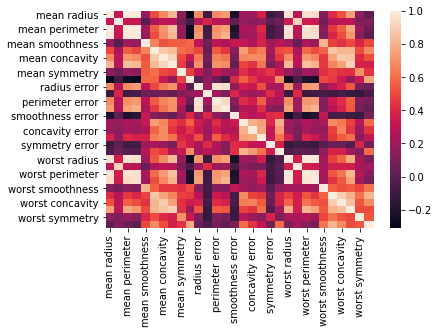

In [87]:
# feature correlation heatmap
plt.figure()
sns.heatmap(df.corr())
plt.show()

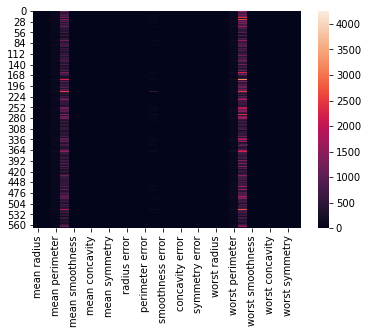

In [21]:
# plot heatmap
fig, ax = plt.subplots()
sns.heatmap(df)

The measured features have very different scales.

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


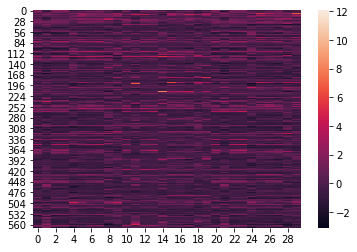

In [24]:
# normalize data (mean centering and scaling to unit-variance)
scaler = preprocessing.StandardScaler(with_mean = True, with_std = True)
df_normalized = scaler.fit_transform(df)
fig, ax = plt.subplots()
sns.heatmap(df_normalized)

[0.44272026 0.18971182 0.09393163]


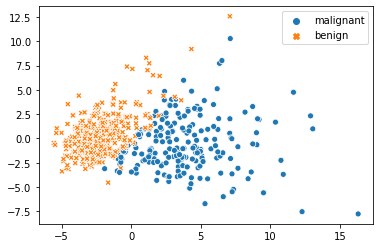

In [97]:
# PCA
from sklearn import decomposition
pca = decomposition.PCA(n_components = 3)
df_normalized_transformed = pca.fit_transform(df_normalized)
# variance explained by principal components
print(pca.explained_variance_ratio_)
plt.figure()
sns.scatterplot(
    x = df_normalized_transformed[:,0], # PC1 
    y = df_normalized_transformed[:,1], # PC2
    hue = classes, style = classes)
